In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import selenium
from urllib.request import Request, urlopen
import requests
from bs4 import BeautifulSoup as soup
import re
import lxml.html as lh
import time
import random

https://medium.com/@raiyanquaium/how-to-web-scrape-using-beautiful-soup-in-python-without-running-into-http-error-403-554875e5abed

## RegExs to invoke for scraping metacritic

In [143]:
find_meta = re.compile(r'metascore_w')
find_critic_rev_num = re.compile(r'\/game\/pc\/.*\/critic-reviews')
find_user_rev_num = re.compile(r'\/game\/pc\/.*\/user-reviews')
find_genre = re.compile(r"Board Games|Trivia|Puzzle|Party \/ Minigame|Massively Multiplayer Online|Sports|Driving|Racing|Open-World|Tactics|MOBA|Real-Time|Historic|Strategy|Turn-Based|4X|Vehicle|Simulation|Virtual|Sandbox|Fantasy|Action RPG|Role-Playing|3D|2D|Rhythm|Survival|Beat-'Em-Up|Fighting|Platformer|Action|Adventure|Sci-Fi|Shooter|First-Person|Arcade")
find_esrb = find_esrb = re.compile('EC|E|E10+|T|M|AO|RP')

## Use the following block to get the list of urls to scrape through.

In [ ]:
# urls = []
# for index in range(28):
#     sublist =[]
#     url = 'https://www.metacritic.com/browse/games/release-date/available/pc/metascore?page='+str(index)
#     req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
#     webpage = urlopen(req).read()
#     meta = soup(webpage,"html.parser")
#     for ref in meta.find_all('a',href = find_game):
#         sublist.append('https://www.metacritic.com'+ref.get('href'))
#     urls.extend(sublist[:-27])
# print(urls)

## Saving to csv so I don't have to wait a few minutes for later

In [ ]:
# meta_url_df = pd.DataFrame(data = {'urls':urls})
# meta_url_df.to_csv("meta_url.csv", sep=',',index=False)

In [3]:
urls = pd.read_csv('meta_url.csv')
urls = urls['urls'].tolist()

## Function to scrape a page

In [4]:
def scrape(page):
    '''
    Function to scrape webpage. Takes an input variable of page, converts it to be usable in beautiful soup,
    which is the website to be scraped.Has an output of a list which will have the values of data.
    '''
    data = [] #title, critic_rating, user_rating, num_critic_rev, num_user_rev, genres, esrb_ratings
    #soupify
    url = page
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    page = soup(webpage,"html.parser")
    
    #title
    data.append(page.find('title').text[:-28])
    
    #critic_rating
    try:
        data.append(page.find(itemprop="ratingValue").getText())
    except:
        data.append(0)
    #user_rating
    try:
        data.append(page.find_all(class_=find_meta)[2].getText())
    except:
        data.append(0)
        
    #num_critic_rev
    try:
        data.append(page.find_all(href=find_critic_rev_num)[2].getText().replace("\n","").replace(" ","").replace("Critics",""))
    except:
        data.append(0)
    #num_user_rev
    try:
        data.append(page.find_all(href=find_user_rev_num)[2].getText().replace(' Ratings', ""))
    except:
        data.append(0)
        
    #genres
    genres = []
    for row in page.find_all('span', class_="data"):
        text = row.getText()
        if re.search(find_genre,text):
            genres.append(re.search(find_genre,text).group())
    data.append(list(set(genres)))
    
    #esrb_ratings
    ratings = []
    for row in page.find_all('span', class_="data"):
        text = row.getText()
        if re.search(find_esrb,text):
            ratings.append(re.search(find_esrb,text).group())
    data.append(list(set(ratings)))
    
    return data

In [5]:
# Test the scrape!
print(scrape(urls[0]))

['Half-Life 2', '96', '9.1', '81', '9732', ['First-Person', 'Action', 'Sci-Fi', 'Arcade', 'Shooter'], ['M']]


## Run the following code block to scrape metacritic and format

In [ ]:
# metacritic = []
# index = 0
# for row in urls:
#     print(str(index)+row)
#     metacritic.append(scrape(row))
# print("done!")

# SUCCESS!
Scraped data!

Now time to make a csv so I don't have to wait over a few hours for it to finish.

In [ ]:
# meta_df = pd.DataFrame.from_records(metacritic, columns = ['title','critic_rating','user_rating','num_critic_rev','num_user_rev','genres','esrb_rating'])
# meta_df.to_csv('metacritic.csv')

In [6]:
meta_df = pd.read_csv('metacritic.csv') # For some reason my csv has an extra column, so let's get rid of that.

In [7]:
# meta_df.drop(['Unnamed: 0'], axis=1, inplace= True)
meta_df

,title,critic_rating,user_rating,num_critic_rev,num_user_rev,genres,esrb_rating
0,Half-Life 2,96,9.1,81,9725,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...",['M']
1,Grand Theft Auto V,96,7.7,57,5350,"['Action', 'Open-World']","['M', 'T']"
2,Out of the Park Baseball 2007,96,2.5,5,801,['Sports'],"['T', 'M', 'E']"
3,The Orange Box,96,9.2,34,1672,"['Action', 'Shooter', 'Sci-Fi', 'First-Person']","['M', 'T', 'E']"
4,Half-Life,96,9.0,24,3719,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'E']"
5,BioShock,96,8.5,44,4234,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'T']"
6,"""Baldurs Gate II: Shadows of Amn""",95,9.2,30,1308,['Role-Playing'],"['RP', 'T']"
7,Divinity: Original Sin II - Definitive Edition,95,9.0,5,162,['Role-Playing'],"['M', 'T']"
8,Portal 2,95,9.0,52,6688,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'E']"
9,Command & Conquer,94,8.9,5,417,"['Real-Time', 'Strategy', 'Sci-Fi']",['T']


In [108]:
# A little preliminary cleaning of the titles
meta_df['title'] = meta_df['title'].str.strip("\"")



,title,critic_rating,user_rating,num_critic_rev,num_user_rev,genres,esrb_rating
0,Half-Life 2,96,9.1,81,9725,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...",['M']
1,Grand Theft Auto V,96,7.7,57,5350,"['Action', 'Open-World']","['M', 'T']"
2,Out of the Park Baseball 2007,96,2.5,5,801,['Sports'],"['T', 'M', 'E']"
3,The Orange Box,96,9.2,34,1672,"['Action', 'Shooter', 'Sci-Fi', 'First-Person']","['M', 'T', 'E']"
4,Half-Life,96,9.0,24,3719,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'E']"
5,BioShock,96,8.5,44,4234,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'T']"
6,Baldurs Gate II: Shadows of Amn,95,9.2,30,1308,['Role-Playing'],"['RP', 'T']"
7,Divinity: Original Sin II - Definitive Edition,95,9.0,5,162,['Role-Playing'],"['M', 'T']"
8,Portal 2,95,9.0,52,6688,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'E']"
9,Command & Conquer,94,8.9,5,417,"['Real-Time', 'Strategy', 'Sci-Fi']",['T']


In [110]:
new_df = meta_df.set_index('title').copy()
new_df

,critic_rating,user_rating,num_critic_rev,num_user_rev,genres,esrb_rating
title,,,,,,
Half-Life 2,96,9.1,81,9725,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...",['M']
Grand Theft Auto V,96,7.7,57,5350,"['Action', 'Open-World']","['M', 'T']"
Out of the Park Baseball 2007,96,2.5,5,801,['Sports'],"['T', 'M', 'E']"
The Orange Box,96,9.2,34,1672,"['Action', 'Shooter', 'Sci-Fi', 'First-Person']","['M', 'T', 'E']"
Half-Life,96,9.0,24,3719,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'E']"
BioShock,96,8.5,44,4234,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'T']"
Baldurs Gate II: Shadows of Amn,95,9.2,30,1308,['Role-Playing'],"['RP', 'T']"
Divinity: Original Sin II - Definitive Edition,95,9.0,5,162,['Role-Playing'],"['M', 'T']"
Portal 2,95,9.0,52,6688,"['Arcade', 'Shooter', 'Sci-Fi', 'Action', 'Fir...","['M', 'E']"


## Cross referencing VGChartz

## RegExs to invoke for scraping VGChartz

In [8]:
find_num = re.compile(r'(\d+){1,3}(,(\d+){1,3}){1,6}')
find_url = re.compile(r'http:\/\/www.vgchartz.com\/game\/.*')

## Create a list of urls from VGChartz

In [ ]:
# vgurls = []
# for index in range(56):
#     sublist =[]
#     url = 'http://www.vgchartz.com/games/games.php?page='+str(index)+'&results=200&name=&console=PC&keyword=&publisher=&genre=&order=TotalShipped&ownership=Both&boxart=Both&banner=Both&showdeleted=&region=All&goty_year=&developer=&direction=DESC&showtotalsales=1&shownasales=0&showpalsales=0&showjapansales=0&showothersales=0&showpublisher=0&showdeveloper=0&showreleasedate=0&showlastupdate=0&showvgchartzscore=0&showcriticscore=0&showuserscore=0&showshipped=1&alphasort=&showmultiplat=No'
#     req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
#     webpage = urlopen(req).read()
#     vg = soup(webpage,"html.parser")
#     for ref in vg.find_all('a',href = find_url)[10:]:
#         sublist.append(ref.get('href'))
#     vgurls.extend(sublist)
# print(vgurls)

## Saving this list to csv to access later

In [ ]:
# vg_url = pd.DataFrame(data = {'vgurls':vgurls})
# vg_url.to_csv("vg_url.csv", sep=',',index=False)

In [9]:
vg_url = pd.read_csv('vg_url.csv')
vg_url = vg_url['vgurls'].tolist()

## Scrape a specific page of video game at VGChartz
Deprecate because of scrape rate returning error

In [96]:
# def scrape_vg(page):
#     '''
#     Meant to scrape vgchartz website. Takes an argument of page, that is the url, then returns a list of length 2.
#     The first index is a string of the website, and the second is how much it shipped up to date.
#     '''
    
#     data = [] #title, units shipped to date
    
#     #convert string url to parsable website through bs4
#     vgpage = page
#     req = Request(vgpage, headers={'User-Agent': 'Mozilla/5.0'})
#     webpage = urlopen(req).read()
#     vgpage = soup(webpage,"html.parser")
    
#     #add the title of the current video game page being processed to data
#     try:
#         data.append(vgpage.find('a', class_="white").getText())
#     except:
#         data.append(np.nan)
#     #add the number of units that are shipped and cast as int
#     for row in vgpage.find_all('b'):
#         text = row.getText()
#         if re.search(find_num,text):
#             try:
#                 data.append(int((re.search(find_num,text).group()).replace(',','')))
#             except:
#                 data.append(np.nan)
#     return data

## Function to scrape tables provided by VGChartz

In [97]:
def scrape_vg_table(url):
    '''
    Takes an input of url and returns a list that contains the title, and the number of units shipped or sold
    '''
    data = []
    row = []
    page = url
    req = Request(page, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    page = soup(webpage,"html.parser")
    
    titles = page.find_all('a', href = find_url)[10:]
    num_titles = len(titles)
    numbers = page.find_all('td',align="center")
    
    for x in range(num_titles):
        row.append(titles[x].text.strip())
        try:
            row.append(int(numbers[1+3*x].text.replace('m','0000').replace('.','')))
        except:
            try:
                row.append(int(numbers[2+3*x].text.replace('m','0000').replace('.','')))
            except:
                row.append(np.nan)
        data.append(row)
        row =[]
    return data

In [98]:
# test scrape ofa page
scrape_vg_table('http://www.vgchartz.com/games/games.php?page=2&results=200&name=&console=PC&keyword=&publisher=&genre=&order=Sales&ownership=Both&boxart=Both&banner=Both&showdeleted=&region=All&goty_year=&developer=&direction=DESC&showtotalsales=1&shownasales=0&showpalsales=0&showjapansales=0&showothersales=0&showpublisher=0&showdeveloper=0&showreleasedate=0&showlastupdate=0&showvgchartzscore=0&showcriticscore=0&showuserscore=0&showshipped=1&alphasort=&showmultiplat=No')

[['Farming Simulator 2015', 1100000],
 ['F.E.A.R. 3', 1100000],
 ['Sniper: Ghost Warrior 2', 1090000],
 ['To the Moon', 1090000],
 ['Championship Manager 99/00', 1070000],
 ['Football Manager 2013', 1060000],
 ['Brothers: A Tale of Two Sons', 1060000],
 ['The Walking Dead: Season Two', 1050000],
 ['Supreme Commander 2', 1050000],
 ['Super Hexagon', 1050000],
 ['Titan Quest', 1040000],
 ['Hotline Miami 2: Wrong Number', 1040000],
 ["Assassin's Creed Origins", 1030000],
 ['Tomb Raider', 1030000],
 ['Serious Sam HD: The First Encounter', 1030000],
 ['The Elder Scrolls Online', 1020000],
 ['Braid', 1010000],
 ['The Wolf Among Us', 1010000],
 ['Championship Manager 3', 1010000],
 ['Resident Evil 5', 1010000],
 ['1503 A.D.: The New World', 1000000],
 ['1701 A.D.', 1000000],
 ['Doom 3', 1000000],
 ['Empire Earth', 1000000],
 ['Mordhau', 1000000],
 ['Return to Castle Wolfenstein', 1000000],
 ['Risk of Rain 2', 1000000],
 ['StarCraft II: Legacy of the Void', 1000000],
 ['Gauntlet', 1000000],
 [

In [102]:
# Now scraping through the pages of data possible.
# Cutting off at 12 because the rest of the titles have no more relevant data
vg_data = []
for x in range(1,13):
    vg_data.extend(scrape_vg_table('http://www.vgchartz.com/games/games.php?page='+str(x)+'&results=200&name=&console=PC&keyword=&publisher=&genre=&order=Sales&ownership=Both&boxart=Both&banner=Both&showdeleted=&region=All&goty_year=&developer=&direction=DESC&showtotalsales=1&shownasales=0&showpalsales=0&showjapansales=0&showothersales=0&showpublisher=0&showdeveloper=0&showreleasedate=0&showlastupdate=0&showvgchartzscore=0&showcriticscore=0&showuserscore=0&showshipped=1&alphasort=&showmultiplat=No'))
    print('Scraped page: '+str(x))

Scraped page: 1
Scraped page: 2
Scraped page: 3
Scraped page: 4
Scraped page: 5
Scraped page: 6
Scraped page: 7
Scraped page: 8
Scraped page: 9
Scraped page: 10
Scraped page: 11
Scraped page: 12


In [104]:
len(vg_data)

2400

## Have all the data, let's put it together

In [113]:
vg_data_df = pd.DataFrame(data = vg_data)
vg_data_df.columns = ['title', 'unit shipped/sold']

In [114]:
newer_df = vg_data_df.set_index('title')


In [253]:
meta_vg = new_df.join(newer_df, how = 'left')

In [254]:
meta_vg.head()

,critic_rating,user_rating,num_critic_rev,num_user_rev,genres,esrb_rating,unit shipped/sold
title,,,,,,,
.hack//G.U. Last Recode,69,7.5,7,20,[''],"['M', 'T']",NaN
007 Legends,26,2.7,5,101,"['Action', 'Shooter', 'Arcade', 'First-Person']","['T', 'M', 'E']",0.0
007: NightFire,59,6.0,14,43,"['Action', 'Shooter', 'Arcade', 'First-Person']","['M', 'T', 'E']",NaN
007: Quantum of Solace,70,6.1,18,59,"['Action', 'Shooter', 'Arcade', 'First-Person']","['T', 'M']",30000.0
0RBITALIS,73,7.3,9,4,"['Action', 'Puzzle']","['T', 'M']",NaN


In [255]:
meta_vg.drop_duplicates(inplace=True)

In [256]:
meta_vg.reset_index(inplace=True)

    Board Games|Trivie|Puzzle|Party / Minigame|Massively Multiplayer Online|Sports|Driving|Racing|Open-World|Tactics|MOBA|Real-Time|Historic|Strategy|Turn-Based|4X|Vehicle|Simulation|Virtual|Sandbox|Fantasy|Action RPG|Role-Playing|3D|2D|Rhythm|Survival|Beat-'Em-Up|Fighting|Platformer|Action|Adventure|Sci-Fi|Shooter|First-Person|Arcade

### These are all the different genres I have right now.
5600 rows of data is pretty good, but for the sake of making an easier model, I'm going to simplify the above subgenres into more broad ones. This is a little shoddy, but we'll recast whatever is highest on the table first because those are more broad.

| Genre    | Subgenre                                                                                                                      |
|----------|-------------------------------------------------------------------------------------------------------------------------------|
|  Action  |  Platformer, Shooter, Fighting,Beat-'Em-Up, Survival, Rhythm, Action, First-Person, Arcade, Sports, Driving, Vehicle, Racing  |
| RPG      | Action RPG, Role-Playing, Fantasy, Sci-Fi, Massively Multiplayer Online, Open-World, Adventure                                  |
| Strategy | Strategy, Turn-Based, 4X, Simulation, Virtual, Sandbox, Tactics, MOBA, Real-Time, Historic                                   |
|  Misc    | Board Games, Trivie, Puzzle, Party / Minigame, 3D, 2D

And while we're on the topic of unpacking(or packing?) things, the esrb rating sometimes has multiple ratings. These are possibly caused by re-releases, added content, or releases on different platforms. To be more restrictive, we'll catch whichever is the higher case and cast it to that (If a tag has M and E, it will go to M because less people can play it.)

In [257]:
action_re = re.compile(r'Platformer|Shooter|Fighting,Beat-\'Em-Up|Survival|Rhythm|Action|First-Person|Arcade|Sports|Driving|Vehicle|Racing')
rpg_re = re.compile(r'Action RPG|Role-Playing|Fantasy|Sci-Fi|Massively Multiplayer Online|Open-World|Adventure')
strategy_re = re.compile('Strategy, Turn-Based, 4X, Simulation, Virtual, Sandbox, Tactics, MOBA, Real-Time, Historic')

### Yikes. I just realized my genres and esrb columns were saved as strings instead of lists.
Time to fix that.

In [258]:
def genre_packer(genre_list):
    genre_list = genre_list.replace('[','').replace(']','').replace('\'','').split(', ')
    for item in genre_list:
        if action_re.match(item):
            return 'Action'
        elif rpg_re.match(item):
            return 'RPG'
        elif strategy_re.match(item):
            return 'Strategy'
        else:
            return 'Misc'

In [259]:
genre_packer(meta_vg['genres'][102])

'RPG'

In [260]:
def esrb_picker(esrb_list):
    esrb_list = esrb_list.replace('[','').replace(']','').replace('\'','').split(', ')
    for rate in esrb_list:
        if rate =='RP':
            return 'RP'
        elif rate == 'AO':
            return 'AO'
        elif rate == 'M':
            return 'M'
        elif 'T':
            return 'T'
        elif 'E':
            return 'E'
        elif 'E10+':
            return 'E10+'
        elif 'EC':
            return 'EC'
    return 'RP'

In [261]:
meta_vg['genres'] = meta_vg['genres'].apply(genre_packer)
meta_vg.head()

,title,critic_rating,user_rating,num_critic_rev,num_user_rev,genres,esrb_rating,unit shipped/sold
0,.hack//G.U. Last Recode,69,7.5,7,20,Misc,"['M', 'T']",NaN
1,007 Legends,26,2.7,5,101,Action,"['T', 'M', 'E']",0.0
2,007: NightFire,59,6.0,14,43,Action,"['M', 'T', 'E']",NaN
3,007: Quantum of Solace,70,6.1,18,59,Action,"['T', 'M']",30000.0
4,0RBITALIS,73,7.3,9,4,Action,"['T', 'M']",NaN


In [264]:
meta_vg['esrb_rating'] = meta_vg['esrb_rating'].apply(esrb_picker)
meta_vg.head()

,title,critic_rating,user_rating,num_critic_rev,num_user_rev,genres,esrb_rating,unit shipped/sold
0,.hack//G.U. Last Recode,69,7.5,7,20,Misc,M,NaN
1,007 Legends,26,2.7,5,101,Action,T,0.0
2,007: NightFire,59,6.0,14,43,Action,M,NaN
3,007: Quantum of Solace,70,6.1,18,59,Action,T,30000.0
4,0RBITALIS,73,7.3,9,4,Action,T,NaN


In [297]:
meta_vg = check

In [268]:
meta_vg['unit shipped/sold'].fillna(1000)
meta_vg['unit shipped/sold'].loc[meta_vg['unit shipped/sold']==0] = 1000
meta_vg['unit shipped/sold'].loc[meta_vg['unit shipped/sold'].isnull()] = 1000

### Let's create some dummies for genres and ratings

In [298]:
title = meta_vg['title']
meta_vg.drop('title', axis=1,inplace=True)
meta_vg = pd.get_dummies(meta_vg).join(title)
meta_vg.head()

,critic_rating,user_rating,num_critic_rev,num_user_rev,unit shipped/sold,genres_Action,genres_Misc,genres_RPG,esrb_rating_AO,esrb_rating_M,esrb_rating_RP,esrb_rating_T,title
0,69,7.5,7,20,1000.0,0,1,0,0,1,0,0,.hack//G.U. Last Recode
1,26,2.7,5,101,1000.0,1,0,0,0,0,0,1,007 Legends
2,59,6.0,14,43,1000.0,1,0,0,0,1,0,0,007: NightFire
3,70,6.1,18,59,30000.0,1,0,0,0,0,0,1,007: Quantum of Solace
4,73,7.3,9,4,1000.0,1,0,0,0,0,0,1,0RBITALIS


In [299]:
columns = meta_vg.columns
columns

Index(['critic_rating', 'user_rating', 'num_critic_rev', 'num_user_rev',
       'unit shipped/sold', 'genres_Action', 'genres_Misc', 'genres_RPG',
       'esrb_rating_AO', 'esrb_rating_M', 'esrb_rating_RP', 'esrb_rating_T',
       'title'],
      dtype='object')

In [302]:
meta_vg = meta_vg[['title','critic_rating', 'user_rating', 'num_critic_rev', 'num_user_rev',
        'genres_Action', 'genres_Misc', 'genres_RPG',
       'esrb_rating_AO', 'esrb_rating_M', 'esrb_rating_RP', 'esrb_rating_T', 'unit shipped/sold']]

In [303]:
meta_vg.head()

,title,critic_rating,user_rating,num_critic_rev,num_user_rev,genres_Action,genres_Misc,genres_RPG,esrb_rating_AO,esrb_rating_M,esrb_rating_RP,esrb_rating_T,unit shipped/sold
0,.hack//G.U. Last Recode,69,7.5,7,20,0,1,0,0,1,0,0,1000.0
1,007 Legends,26,2.7,5,101,1,0,0,0,0,0,1,1000.0
2,007: NightFire,59,6.0,14,43,1,0,0,0,1,0,0,1000.0
3,007: Quantum of Solace,70,6.1,18,59,1,0,0,0,0,0,1,30000.0
4,0RBITALIS,73,7.3,9,4,1,0,0,0,0,0,1,1000.0


In [305]:
correlations = meta_vg.corr()

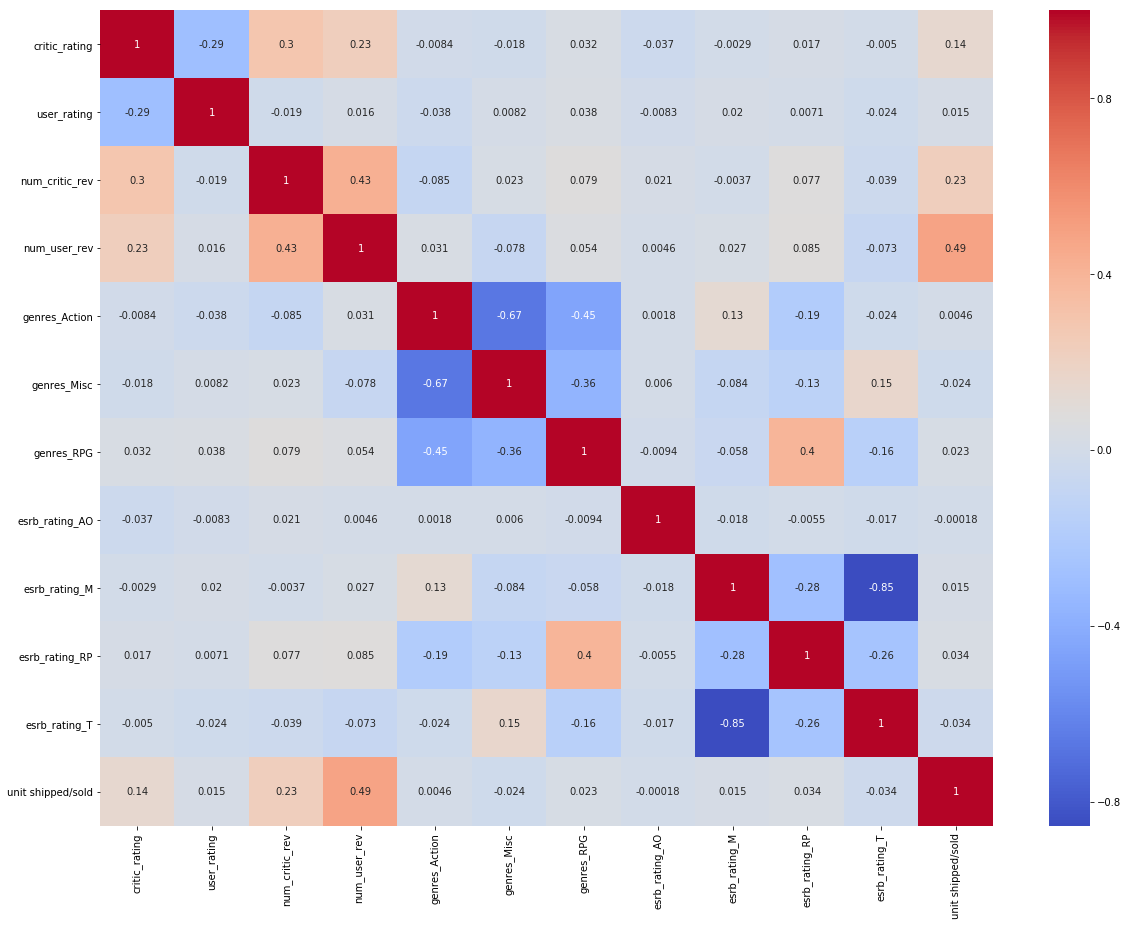

In [313]:
plt.subplots(figsize=(20,15))
sns.heatmap(correlations,cmap='coolwarm',annot=True)